In [1]:
import pandas as pd
import csv
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
#read vectors and names

frame = pd.read_csv("/home/rin/CrossPlatform/Code/entity_vecs_onlyPROPN.csv", header=None)

In [3]:
vectors = frame.iloc[:, 1:]

In [4]:
vectors.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.001111,0.007694,-0.013193,0.002277,0.001425,0.008855,0.001344,-0.003634,0.002648,-0.001622,...,0.000936,0.005777,0.006525,0.000239,0.003887,0.002487,-0.001279,-0.005166,0.005642,0.000028
1,0.002282,0.013210,-0.013372,0.007318,0.002672,0.015021,0.005350,0.001469,0.000112,-0.003898,...,0.003916,0.006667,0.007948,-0.003036,-0.000457,0.007797,-0.005251,-0.005143,0.003674,-0.002303
2,-0.006058,0.035130,-0.019281,0.000566,0.006083,0.019783,0.015781,-0.008688,0.004104,-0.013092,...,0.001131,0.011191,0.012964,-0.009249,0.003564,0.008661,-0.001564,-0.012390,0.010775,-0.009490
3,-0.008021,0.041882,-0.023921,0.000074,0.012999,0.030620,0.011261,-0.007864,0.011873,-0.016689,...,-0.004126,0.012571,0.018760,-0.000521,0.009847,0.016102,-0.008885,-0.014268,0.010243,-0.005245
4,0.013215,1.012015,-0.852180,0.490863,0.338856,0.683575,0.696290,-0.108314,0.155370,-0.419443,...,-0.025576,0.228806,0.409325,-0.104014,0.052956,0.272815,-0.410445,-0.741947,0.190902,-0.510724


In [5]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#tsne = TSNE(n_components=2, random_state=0)
#tsne_2d = tsne.fit_transform(vectors.values) 

pca = PCA( random_state=0)
pca_2d= pca.fit_transform(vectors.values)

Populating the interactive namespace from numpy and matplotlib


(0, 5)

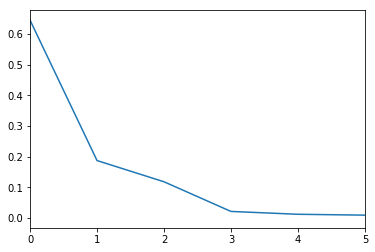

In [6]:
%pylab inline
ax=plot(pca.explained_variance_ratio_)
gca().set_xlim((0, 5))

In [7]:
pca.explained_variance_ratio_[:5].sum()


0.9826435111168063

In [12]:
import bokeh
import bokeh.models as bmo
from bokeh.palettes import d3, viridis
from bokeh.models import HoverTool, LabelSet
from bokeh.plotting import figure, show, ColumnDataSource
# from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

x = pca_2d[:, 0]
y = pca_2d[:, 1]
names = frame.iloc[:, 0]

source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            names=names,
            
        )
    )

# Add author names and sizes to mouse-over info.
hover = HoverTool(
        tooltips=[
        ("entity", "@names"),
        ]
    )

p = figure(tools=[hover, 'crosshair,pan,wheel_zoom,box_zoom,reset,save,lasso_select'], plot_width=1000, plot_height=1000)
p.scatter('x', 'y', source=source, 
          fill_alpha=0.6, line_color=None)
labels = LabelSet(x='x', y='y', text='names', level='glyph',
              x_offset=0, y_offset=0, source=source, render_mode='canvas', text_font_size="6pt")
p.add_layout(labels)

show(p)

In [13]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
tsne = TSNE(n_components=2, random_state=0)
tsne_2d = tsne.fit_transform(vectors.values) 


In [14]:
import bokeh
import bokeh.models as bmo
from bokeh.palettes import d3, viridis
from bokeh.models import HoverTool, LabelSet
from bokeh.plotting import figure, show, ColumnDataSource
# from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

x = tsne_2d[:, 0]
y = tsne_2d[:, 1]
names = frame.iloc[:, 0]

source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            names=names,
            
        )
    )

# Add author names and sizes to mouse-over info.
hover = HoverTool(
        tooltips=[
        ("entity", "@names"),
        ]
    )

p = figure(tools=[hover, 'crosshair,pan,wheel_zoom,box_zoom,reset,save,lasso_select'], plot_width=1000, plot_height=1000)
p.scatter('x', 'y', source=source, 
          fill_alpha=0.6, line_color=None)
labels = LabelSet(x='x', y='y', text='names', level='glyph',
              x_offset=0, y_offset=0, source=source, render_mode='canvas', text_font_size="6pt")
p.add_layout(labels)

show(p)